In [143]:
import os
import glob
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


input_dir = "../mcdc_data/"
output_csv = "../mcdc_data/subshell_be.csv"

rows = []

for file_path in glob.glob(os.path.join(input_dir, "*.h5")):
    file_name = os.path.basename(file_path)
    # print("Reading:", file_name)

    with h5py.File(file_path, "r") as f:
        atomic_number = f["atomic_number"][()]
        element_name = f["element_name"][()]
        atomic_weight_ratio = f["atomic_weight_ratio"][()]
        brems_group = f["electron_reactions/bremsstrahlung"]
        exc_group = f["electron_reactions/excitation"]
        els_group = f["electron_reactions/elastic_scattering"]
        ion_group = f["electron_reactions/ionization"]

        subshells_group = f["electron_reactions/ionization/subshells"]

        for subshell_name, subshell_grp in subshells_group.items():
            binding_energy = subshell_grp["binding_energy"][()]

            rows.append({
                "file": file_name,
                "Z": int(atomic_number),
                "element_name": element_name,
                "atomic_weight_ratio": float(atomic_weight_ratio),
                "subshell": subshell_name,
                "binding_energy": float(binding_energy),
            })

df = pd.DataFrame(rows)
print(df)

df.to_csv(output_csv, index=False)
print("Saved!:", output_csv)




       file   Z element_name  atomic_weight_ratio subshell  binding_energy
0     Ne.h5  10        b'Ne'            20.005647        K          870.10
1     Ne.h5  10        b'Ne'            20.005647       L1           48.47
2     Ne.h5  10        b'Ne'            20.005647       L2           21.66
3     Ne.h5  10        b'Ne'            20.005647       L3           21.66
4     Tb.h5  65        b'Tb'           157.559714        K        51999.00
...     ...  ..          ...                  ...      ...             ...
1607  Te.h5  52        b'Te'           126.503819       N4           48.00
1608  Te.h5  52        b'Te'           126.503819       N5           46.00
1609  Te.h5  52        b'Te'           126.503819       O1           17.84
1610  Te.h5  52        b'Te'           126.503819       O2            9.01
1611  Te.h5  52        b'Te'           126.503819       O3            9.01

[1612 rows x 6 columns]
Saved!: ../mcdc_data/subshell_be.csv


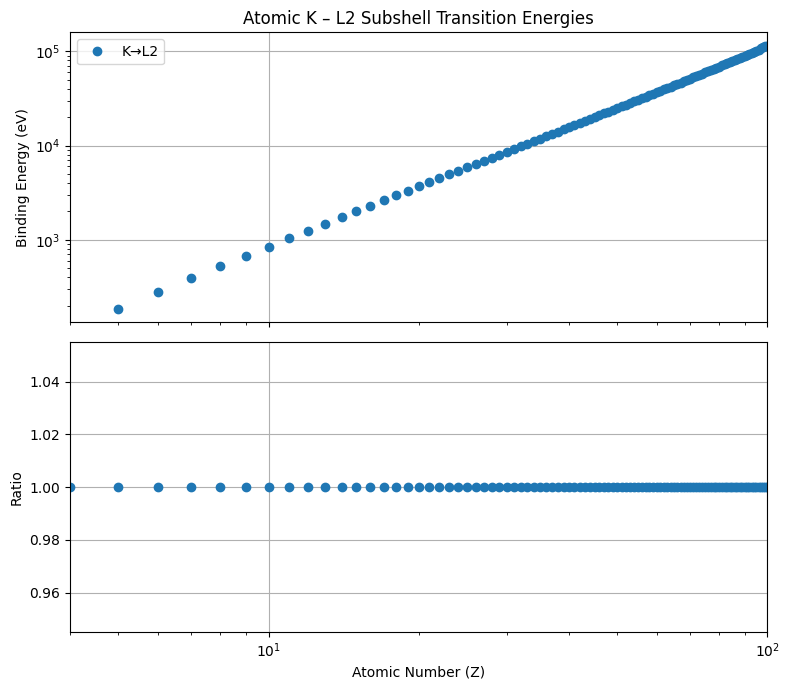

In [144]:
df_k = df[df["subshell"] == "K"].set_index("Z")
df_l2 = df[df["subshell"] == "L2"].set_index("Z")

df_trans = (df_k["binding_energy"] - df_l2["binding_energy"]).reset_index()
df_trans.columns = ["Z", "transition_energy"]

ratio = df_k["binding_energy"] / df_k["binding_energy"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

ax1.plot(df_trans["Z"], df_trans["transition_energy"], "o", label="K→L2")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(4,100)
ax1.set_ylabel("Binding Energy (eV)")
ax1.set_title("Atomic K – L2 Subshell Transition Energies")
ax1.grid(True)
ax1.legend()

ax2.plot(df_trans["Z"], ratio, "o", label="Ratio")
ax2.set_xlabel("Atomic Number (Z)")
ax2.set_ylabel("Ratio")
ax2.grid(True)

plt.tight_layout()
plt.show()


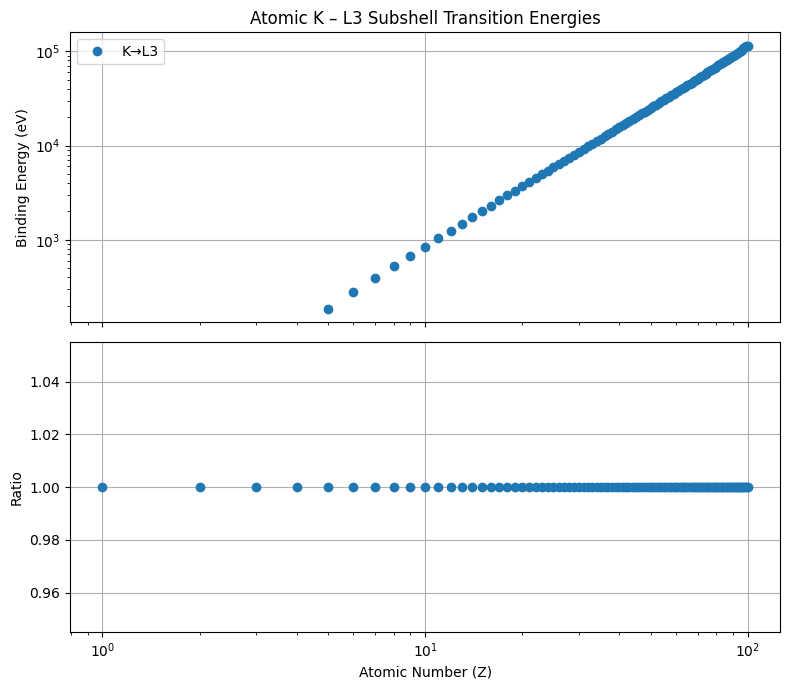

In [145]:
df_l3 = df[df["subshell"] == "L3"].set_index("Z")

df_trans = (df_k["binding_energy"] - df_l2["binding_energy"]).reset_index()
df_trans.columns = ["Z", "transition_energy"]

ratio = df_k["binding_energy"] / df_k["binding_energy"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

ax1.plot(df_trans["Z"], df_trans["transition_energy"], "o", label="K→L3")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylabel("Binding Energy (eV)")
ax1.set_title("Atomic K – L3 Subshell Transition Energies")
ax1.grid(True)
ax1.legend()

ax2.plot(df_trans["Z"], ratio, "o", label="Ratio")
ax2.set_xlabel("Atomic Number (Z)")
ax2.set_ylabel("Ratio")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [146]:
df[df["Z"] == 1]

,file,Z,element_name,atomic_weight_ratio,subshell,binding_energy
1363,H.h5,1,b'H',0.999241,K,13.6


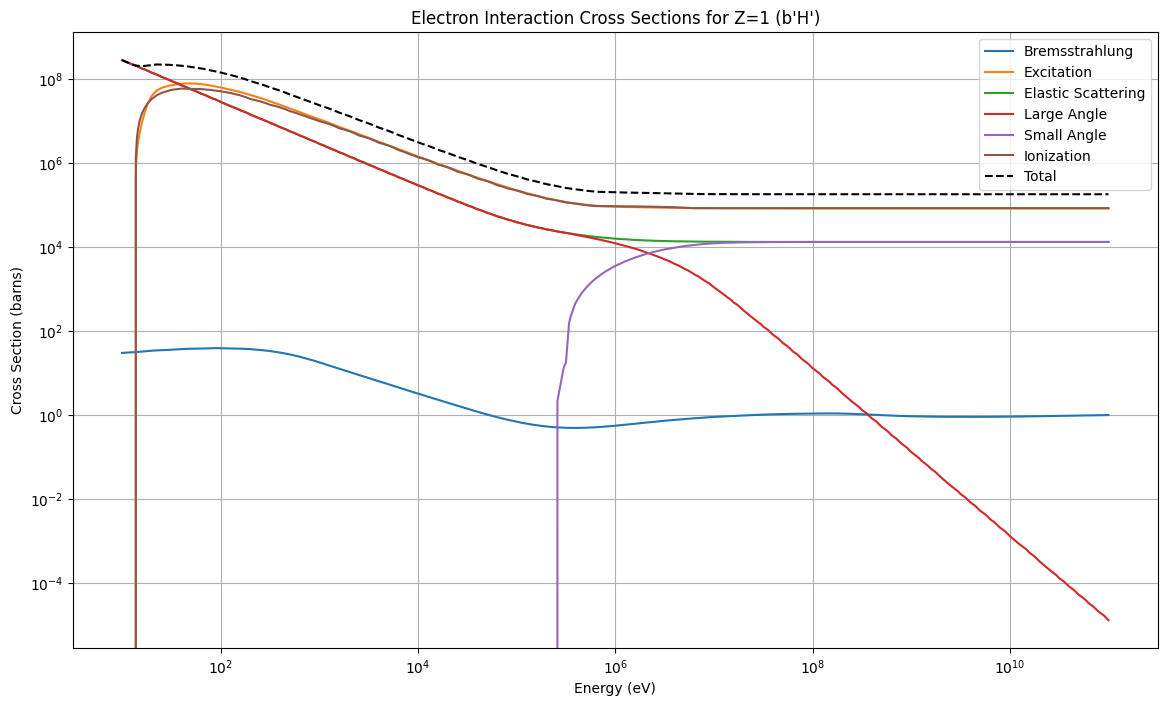

In [155]:
with h5py.File("../mcdc_data/H.h5", "r") as f:
    atomic_number = f["atomic_number"][()]
    element_name = f["element_name"][()]
    atomic_weight_ratio = f["atomic_weight_ratio"][()]
    energy_bin = f["electron_reactions/xs_energy_grid"][()]
    brems_group = f["electron_reactions/bremsstrahlung"]
    exc_group = f["electron_reactions/excitation"]
    els_group = f["electron_reactions/elastic_scattering"]
    la_group = f["electron_reactions/elastic_scattering/large_angle"]
    sa_group = f["electron_reactions/elastic_scattering/small_angle"]
    ion_group = f["electron_reactions/ionization"]
    total_group = f["electron_reactions/total"]


    brems = brems_group["xs"][()]
    exc = exc_group["xs"][()]
    els = els_group["xs"][()]
    la = la_group["xs"][()]
    sa = sa_group["xs"][()]
    ion = ion_group["xs"][()]
    total = total_group["xs"][()]


plt.figure(figsize=(14, 8))
plt.plot(energy_bin, brems, label="Bremsstrahlung")
plt.plot(energy_bin, exc, label="Excitation")
plt.plot(energy_bin, els, label="Elastic Scattering")
plt.plot(energy_bin, la, label="Large Angle")
plt.plot(energy_bin, sa, label="Small Angle")
plt.plot(energy_bin, ion, label="Ionization")
plt.plot(energy_bin, total, label="Total", linestyle="--", color="black")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barns)")
plt.title(f"Electron Interaction Cross Sections for Z={atomic_number} ({element_name})")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()





In [98]:
t = la + sa
total = els

#total - t

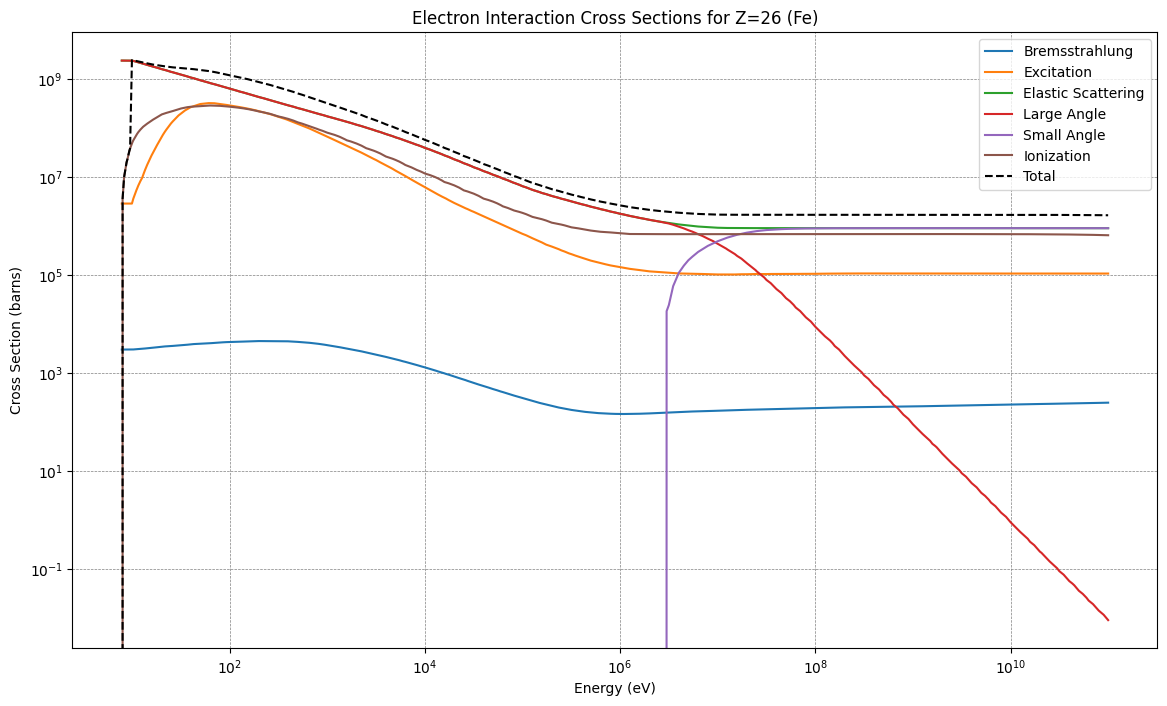

In [154]:
el26 = "Fe"
with h5py.File(f"../mcdc_data/{el26}.h5", "r") as f:
    atomic_number = f["atomic_number"][()]
    element_name = f["element_name"][()]
    atomic_weight_ratio = f["atomic_weight_ratio"][()]
    energy_bin = f["electron_reactions/xs_energy_grid"][()]
    brems_group = f["electron_reactions/bremsstrahlung"]
    exc_group = f["electron_reactions/excitation"]
    els_group = f["electron_reactions/elastic_scattering"]
    la_group = f["electron_reactions/elastic_scattering/large_angle"]
    sa_group = f["electron_reactions/elastic_scattering/small_angle"]
    ion_group = f["electron_reactions/ionization"]
    total_group = f["electron_reactions/total"]


    brems = brems_group["xs"][()]
    exc = exc_group["xs"][()]
    els = els_group["xs"][()]
    la = la_group["xs"][()]
    sa = sa_group["xs"][()]
    ion = ion_group["xs"][()]
    total = total_group["xs"][()]


plt.figure(figsize=(14, 8))
plt.plot(energy_bin, brems, label="Bremsstrahlung")
plt.plot(energy_bin, exc, label="Excitation")
plt.plot(energy_bin, els, label="Elastic Scattering")
plt.plot(energy_bin, la, label="Large Angle")
plt.plot(energy_bin, sa, label="Small Angle")
plt.plot(energy_bin, ion, label="Ionization")
plt.plot(energy_bin, total, label="Total", linestyle="--", color="black")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-', linewidth='0.25', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barns)")
plt.title(f"Electron Interaction Cross Sections for Z={atomic_number} ({el26})")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

energy: 1750000.0 eV
Number of points for this energy: 200


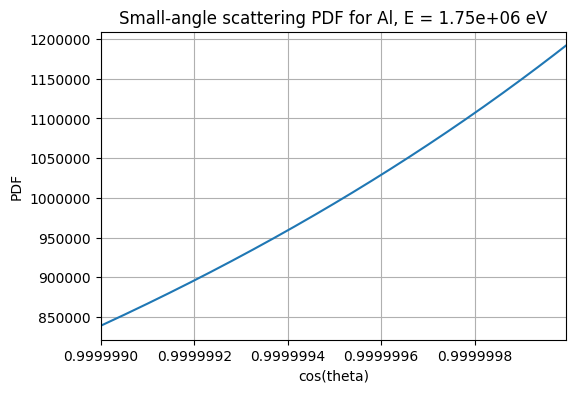

In [139]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

al13 = "Al"
with h5py.File(f"../mcdc_data/{al13}.h5", "r") as ff:
    g = ff["electron_reactions/elastic_scattering/small_angle/scattering_cosine"]
    E    = g["energy_grid"][()]      # shape (164,)
    offs = g["energy_offset"][()]    # shape (165,)
    mu   = g["value"][()]            # shape (32800,)
    pdf  = g["PDF"][()]              # shape (32800,)

E_target = 1e4
i = np.searchsorted(E, E_target) - 1
i = max(0, min(i, len(E)-1))

start, end = offs[i], offs[i+1]
mu_i  = mu[start:end]
pdf_i = pdf[start:end]

print("energy:", E[i], "eV")
print("Number of points for this energy:", len(mu_i))

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(mu_i, pdf_i)

# X-ekseni doğru gösterilsin
ax.set_xlim(mu_i.min(), mu_i.max())
ax.ticklabel_format(useOffset=False, style="plain")

ax.set_xlabel("cos(theta)")
ax.set_ylabel("PDF")
ax.set_title(f"Small-angle scattering PDF for {al13}, E = {E[i]:.2e} eV")
ax.grid(True)

plt.show()



In [137]:
area = np.trapezoid(pdf_i, mu_i)
print("Integral PDF dmu ≈", area) 

Integral PDF dmu ≈ 0.9949233583154544
